In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-dataset/bitcoin_price_Training - Training.csv


# Reading the data and performing common analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
filename = "/kaggle/input/bitcoin-dataset/bitcoin_price_Training - Training.csv"
bitcoin = pd.read_csv(filename)

In [4]:
bitcoin.head(10)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
5,"Jul 26, 2017",2577.77,2610.76,2450.80,2529.45,"937,404,000","42,455,000,000"
6,"Jul 25, 2017",2757.50,2768.08,2480.96,2576.48,"1,460,090,000","45,410,100,000"
7,"Jul 24, 2017",2732.70,2777.26,2699.19,2754.86,"866,474,000","44,995,600,000"
8,"Jul 23, 2017",2808.10,2832.18,2653.94,2730.40,"1,072,840,000","46,231,100,000"
9,"Jul 22, 2017",2668.63,2862.42,2657.71,2810.12,"1,177,130,000","43,929,600,000"


In [5]:
bitcoin.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [6]:
bitcoin.shape

(1556, 7)

In [7]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [8]:
bitcoin.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [9]:
bitcoin.duplicated().sum()

0

It seems like the Data column is of object (string) datatype. Let's convert them to timestamp

In [10]:
bitcoin['Date'] = bitcoin['Date'].astype(dtype = 'datetime64[ns]')

In [11]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [12]:
bitcoin = bitcoin.sort_index(ascending = False).reset_index().drop(columns = ['index'], axis = 1)
bitcoin

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


It looks like there are no values entered at the column - volume. But in our analysis we are not going to use the column series. Date starts from 2013-04-28 and goes till 2017-07-31

In [13]:
bitcoin['Date'].min()

Timestamp('2013-04-28 00:00:00')

# Analysing change in price of stock

In [14]:
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [ ]:
plt.figure(figsize = (20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(bitcoin['Date'], bitcoin[col])
    plt.title(label = col)

# Analysing open , high , low , close value of Bitcoin

In [16]:
!pip install chart-studio
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00


In [17]:
bt = bitcoin[0:151]
bt

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
146,2013-09-21,126.95,128.61,126.24,127.43,-,"1,488,870,000"
147,2013-09-22,127.87,133.94,126.59,129.12,-,"1,500,260,000"
148,2013-09-23,128.98,132.72,125.66,125.95,-,"1,513,940,000"
149,2013-09-24,126.05,127.46,125.39,127.25,-,"1,480,210,000"


In [18]:
# Import libraries
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# Set renderer explicitly
pio.renderers.default = 'plotly_mimetype'

# Create your candlestick chart
trace = go.Candlestick(x=bt['Date'],
                      high=bt['High'],
                      low=bt['Low'],
                      open=bt['Open'],
                      close=bt['Close'])

# Create and show figure with more explicit settings
fig = go.Figure(data=[trace])

# Update layout
fig.update_layout(
    title='Bitcoin Historical Price',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly'  # Add a template
)

fig.show(renderer='iframe')

#The fig.show(renderer='iframe') command tells Plotly to display the visualization in an embedded HTML iframe within your notebook. Here's what this means:

# What iframe is:

# It's like a mini web browser window embedded within your notebook
# Creates an isolated environment for the plot
# Runs the visualization in its own HTML context

# Analysing closing price (on normal scale & log-scale)

<Axes: >

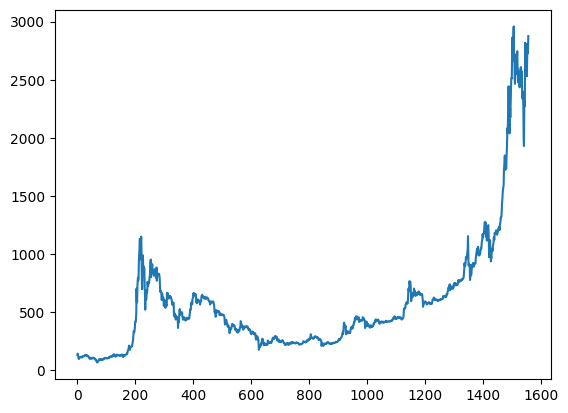

In [19]:
bitcoin['Close'].plot()

In [23]:
# this graph is plotted with x axis being the index of the data. But I would rather prefer to see the closing price against the date.
bitcoin.set_index('Date', inplace = True)

<Axes: xlabel='Date'>

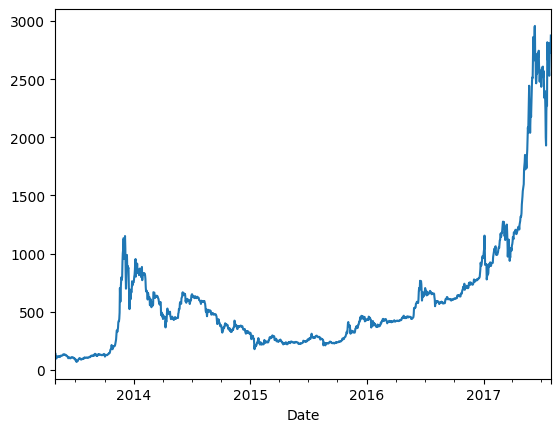

In [25]:
bitcoin['Close'].plot()

Text(0.5, 1.0, 'log-scale')

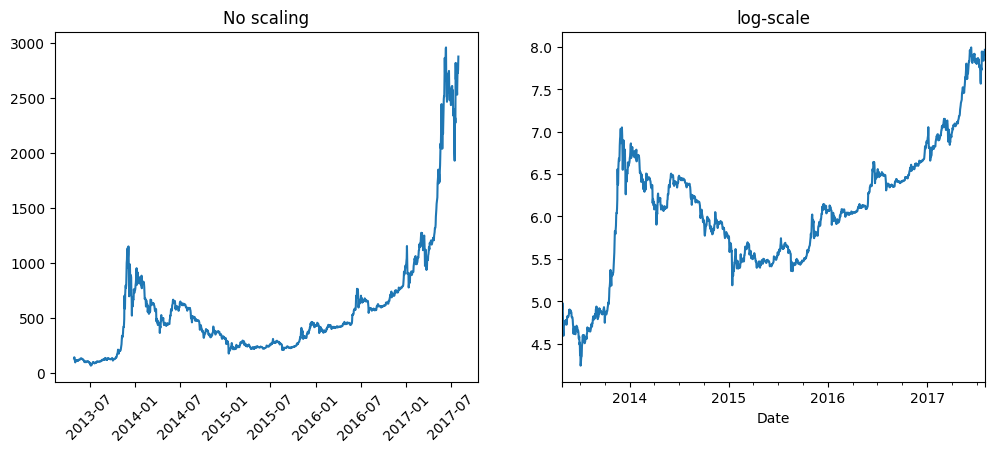

In [29]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
plt.plot(bitcoin['Close'])
plt.title(label = 'No scaling')
plt.xticks(rotation = 45)


plt.subplot(2,2,2)
np.log1p(bitcoin['Close']).plot()
plt.title(label = 'log-scale')

# Analyzing closing price on yearly, quartely and monthly bases

We will be using Resample function because it is a convinient method for frequency conversion and resampling of time series. The object must have a datetime-like index 

In [32]:
bitcoin['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

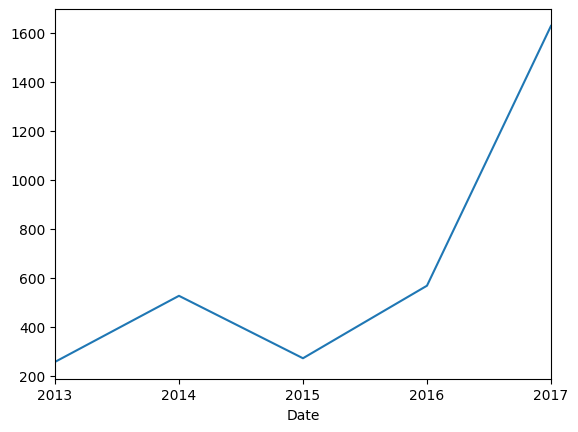

In [33]:
bitcoin['Close'].resample('Y').mean().plot()

In [34]:
bitcoin['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<Axes: xlabel='Date'>

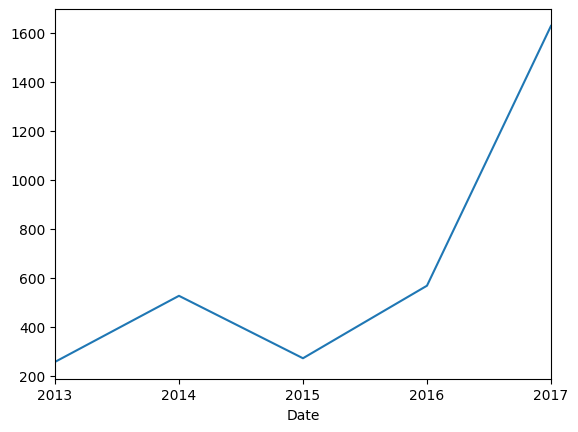

In [35]:
bitcoin['Close'].resample('Y').mean().plot()

In [36]:
bitcoin['Close'].resample('Q').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

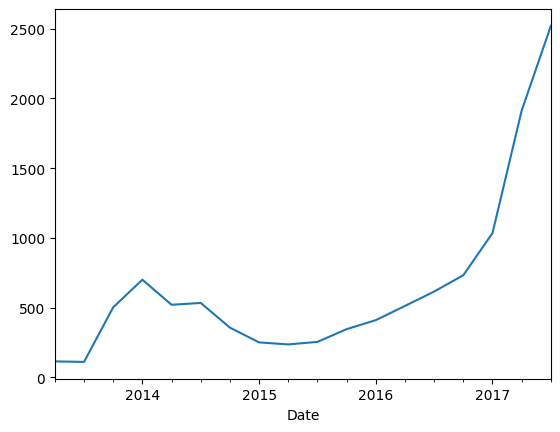

In [39]:
bitcoin['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

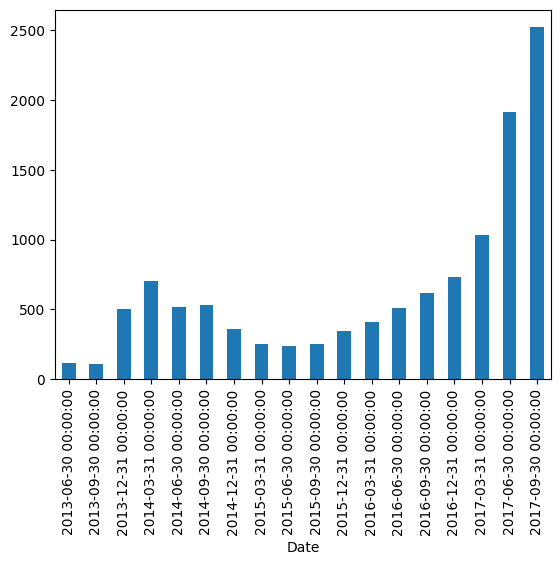

In [44]:
bitcoin['Close'].resample('Q').mean().plot(kind = 'bar')